# Intro

In this notebook, the idea is to compare my personal implementation of the (epsilon-greedy) K Arm bandit with vowpal wabbit implementation. 

# Imports

In [1]:
%load_ext autoreload
%autoreload 2

In [8]:
import numpy as np
import sklearn as sk
from vowpalwabbit import pyvw
import os,sys
import matplotlib, matplotlib.pyplot as plt
import tqdm

In [9]:
%matplotlib inline

In [10]:
sys.path.append('../')

In [11]:
from my_first_bandit import KBanditEnvironment, EpsilonGreedyAgent

# Test environment

In [12]:
k = 5
N = 10000

In [13]:
env = KBanditEnvironment(k)

In [14]:
eps = 0.1
epsilon_agent = EpsilonGreedyAgent(k,eps)
state = 0 # In Bandit, always in initial / final state

In [15]:
action = epsilon_agent.agent_start(state)

In [16]:
list_actions = []
list_rewards = []

In [17]:
for step in tqdm.tqdm(range(N)):
    list_actions.append(action)
    reward = env.pull_arm(action, True)
    list_rewards.append(reward)
    action = epsilon_agent.take_step(reward, state)    

100%|██████████| 10000/10000 [00:00<00:00, 29489.82it/s]


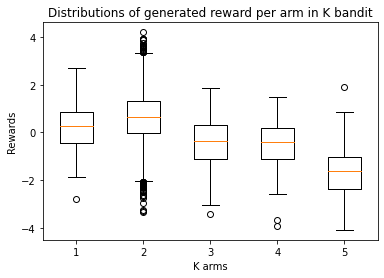

In [18]:
env.print_rewards()

In [19]:
print('Arm\tEstimate\tTrue Mean')
for arm in range(k):
    print('{arm}\t{qval:.3f}\t\t{kmean:.3f}'.format(arm=arm,qval=epsilon_agent.q_values[arm], kmean=env.k_means[arm]))

Arm	Estimate	True Mean
0	0.212		0.131
1	0.640		0.652
2	-0.349		-0.315
3	-0.489		-0.500
4	-1.639		-1.640


$$
\mbox{RMSE} = \sqrt{\frac{1}{K} \sum_{k\in [1,K]} (\hat{q_k} - \mu_{k})^2}
$$

In [20]:
rmse = np.sqrt(np.mean(np.square(np.subtract(epsilon_agent.q_values, env.k_means))))

# VW

In [34]:
vw = pyvw.vw("--cb_explore 5 --epsilon 0.1".format(k=k, eps=eps))

In [35]:
env_2 = KBanditEnvironment(k)

In [39]:
action = 0
for i in range(1):
    reward = env_2.pull_arm(action)
    vw.learn("{action}:{cost}".format(action=action, cost=-reward))
    action = vw.predict(":")

In [38]:
reward

-0.2317205429647607